# KOBE Bryant Shot Selection

Kobe Bryant marked his retirement from the NBA by scoring 60 points in his final game as a Los Angeles Laker on Wednesday, April 12, 2016. Drafted into the NBA at the age of 17, Kobe earned the sport’s highest accolades throughout his long career.

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

---
# Exploratory Data Analysis, Cleaning, and Feature Engineering
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Setting a Random Seed for Consistency

In [2]:
from numpy.random import seed
seed(1)

# 0. Read In Data

**From initial exploration, we see that there is an index on this dataset ```shot_id```**

In [3]:
df_raw = pd.read_csv('../data/kobe_data.csv', index_col = 'shot_id')
print(df_raw.shape)
df_raw.head()

(30697, 24)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


---

# 1. Initial (Quick) Exploratory Data Analysis

Let's just briefly get an idea of what we're looking at. The first 5 rows from above already gave us some idea, but we can utilize some quick methods and plots to see what were working with.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [5]:
df_raw.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09


## Some Quick Visualizations to see if anything sticks out

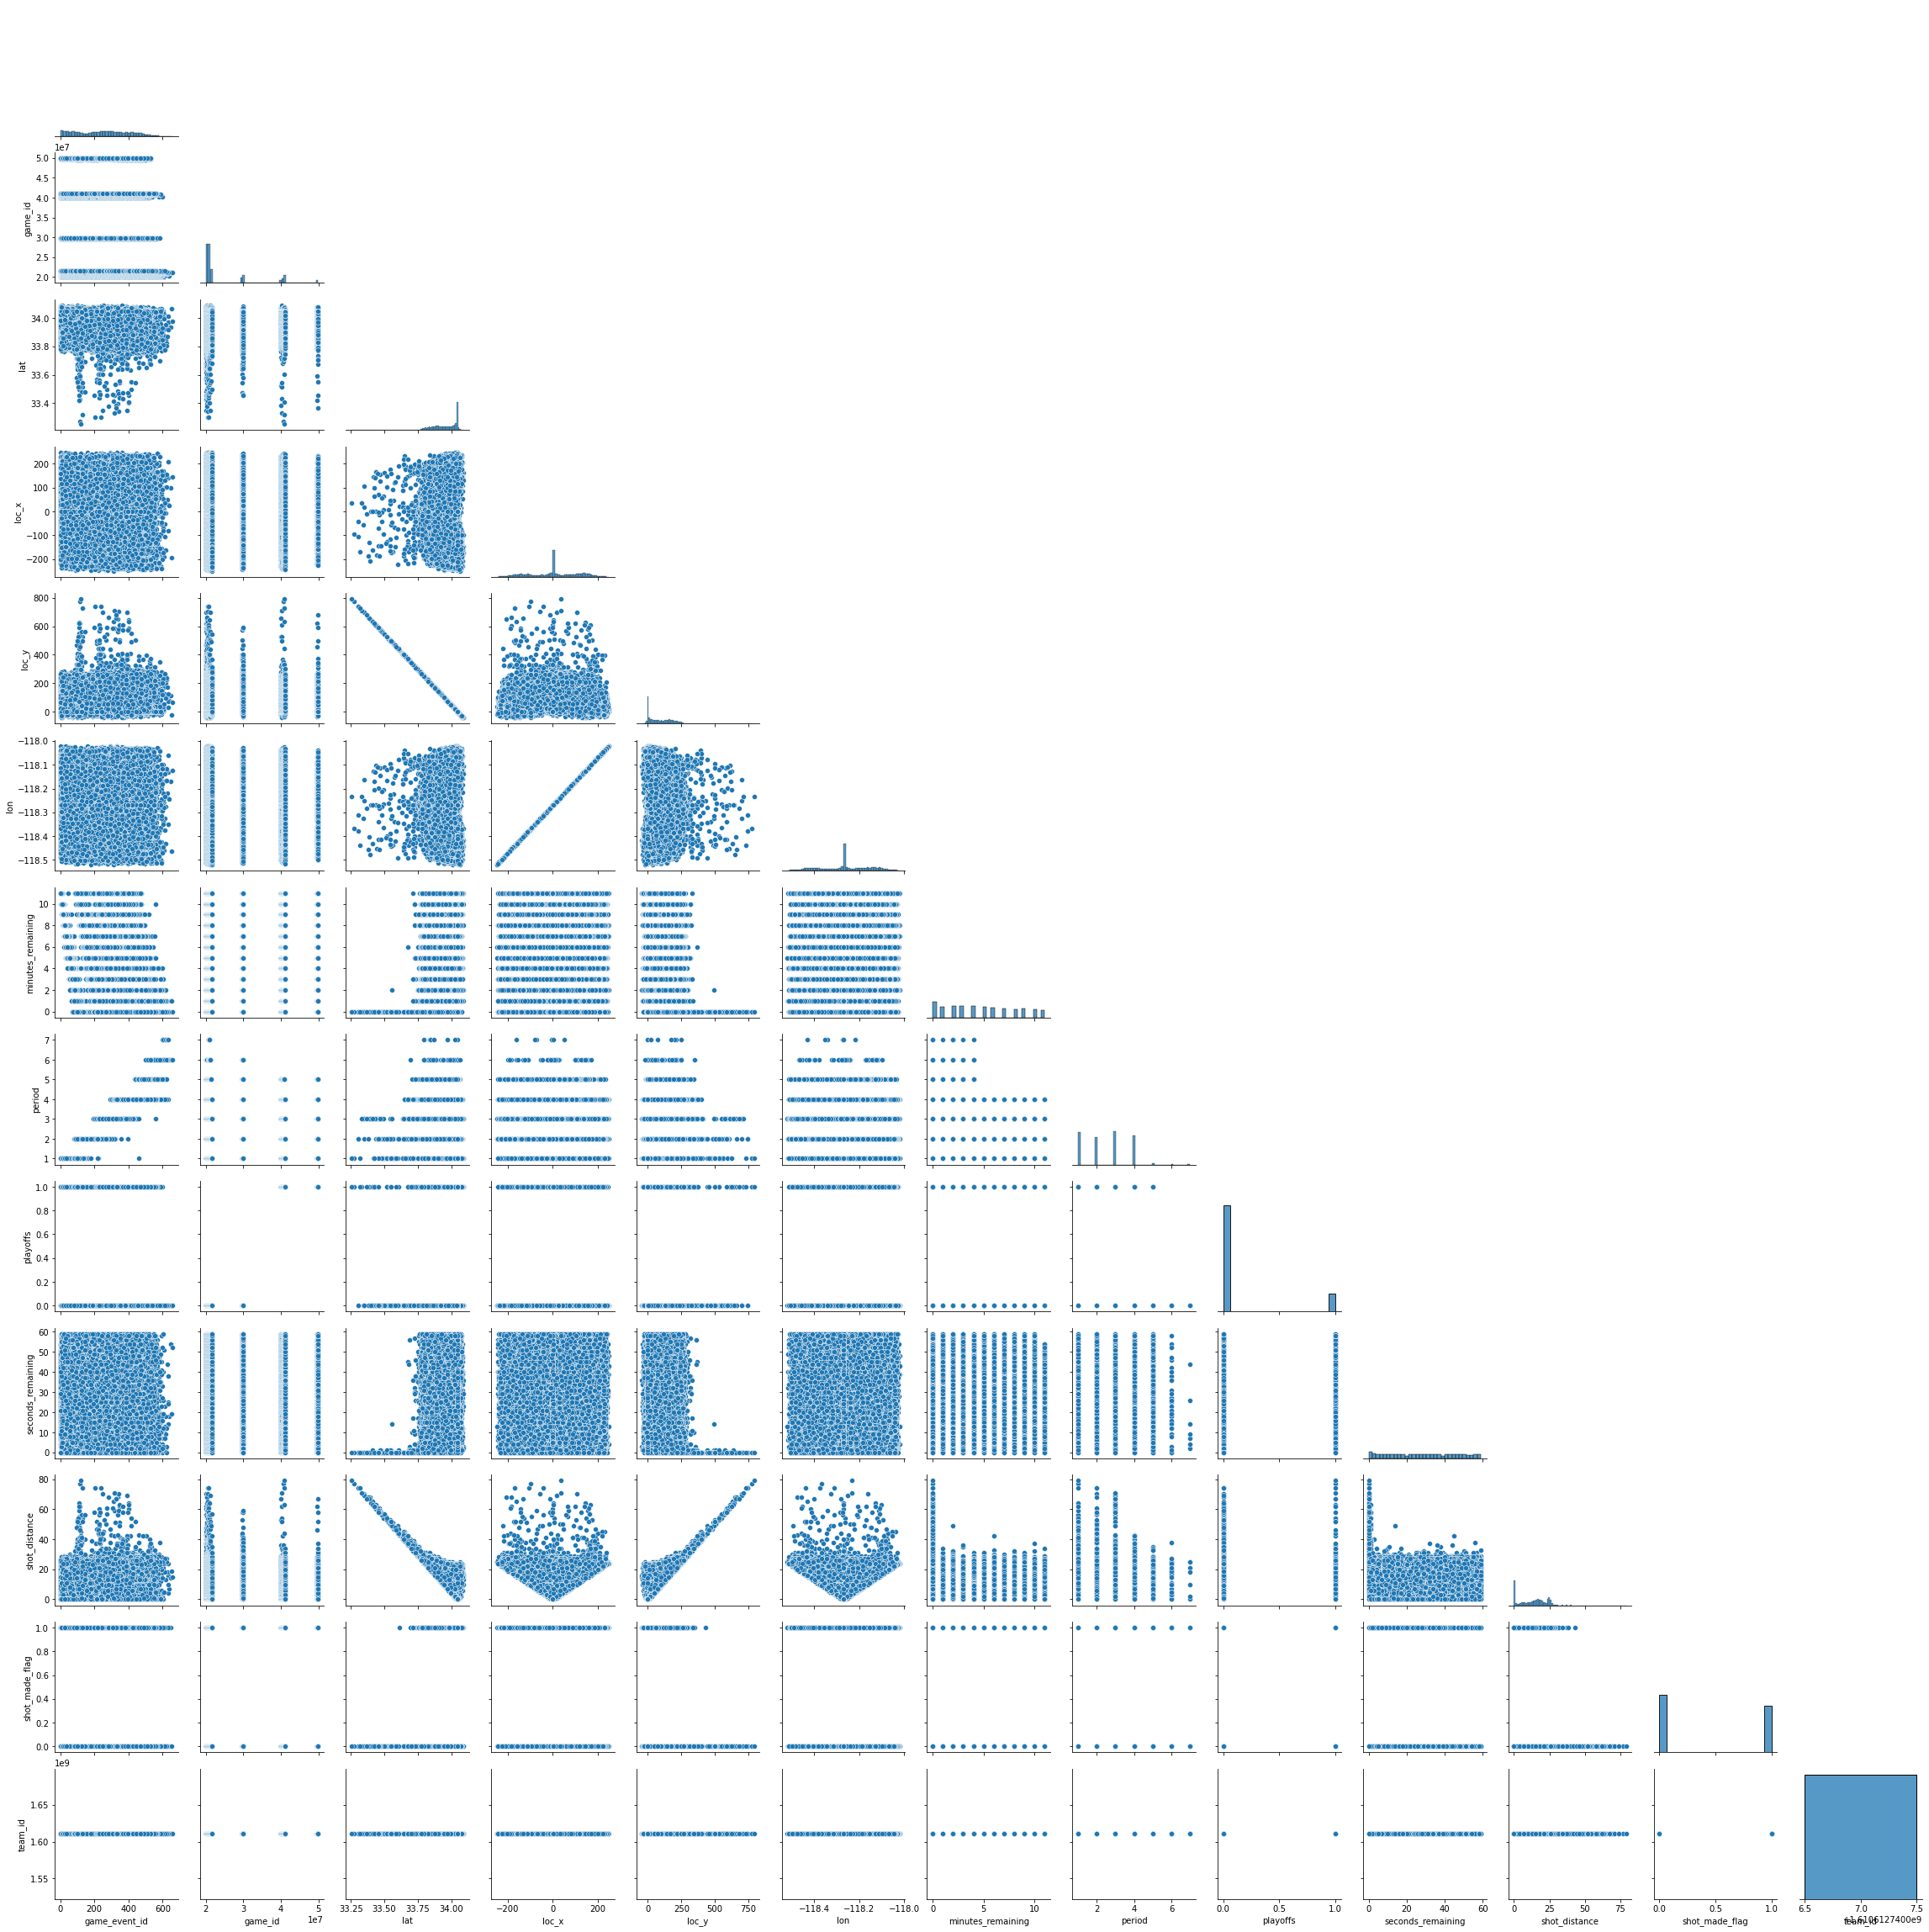

In [6]:
sns.pairplot(df_raw, corner=True);

> **Nothing looks too unusual on a first, very brief, inspection.**

### How do our numerical columns correlate with each other?

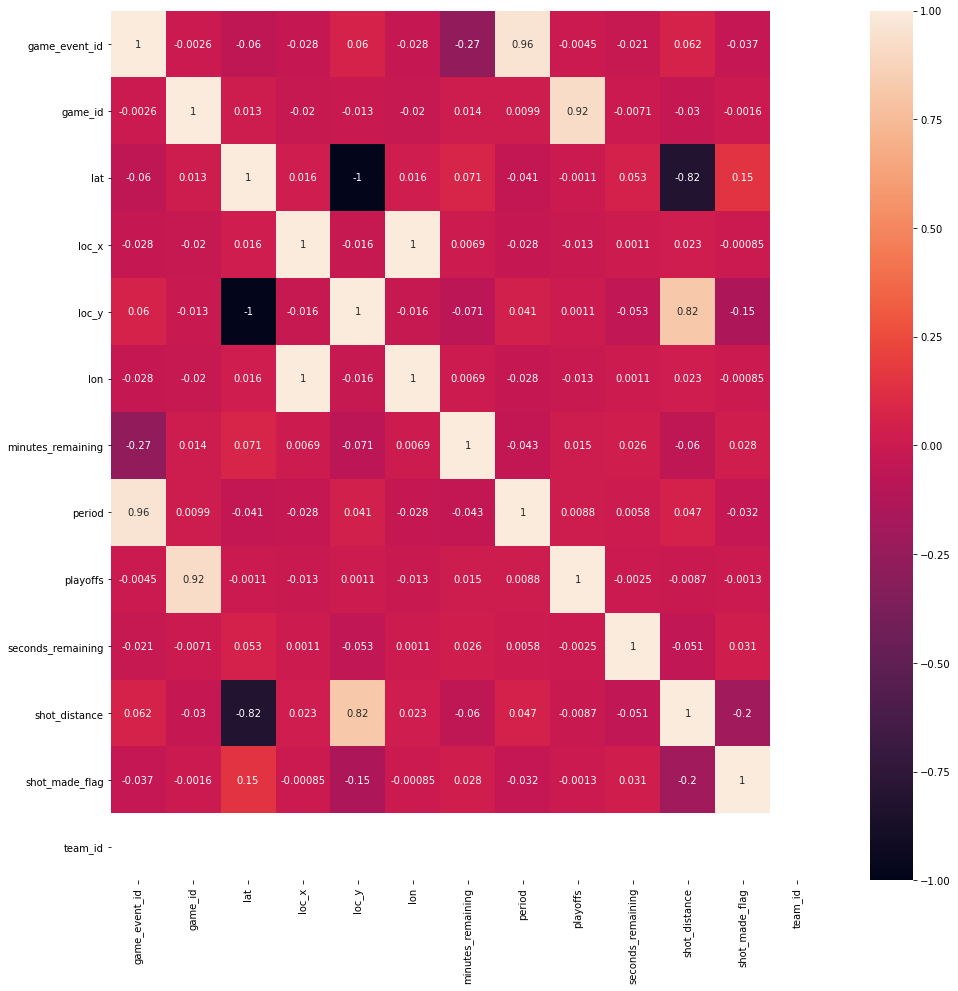

In [7]:
plt.figure(figsize=(16,16))
sns.heatmap(df_raw.corr(), annot=True, vmin=-1, vmax=1);

**Couple of intersting correlations that make sense:**
- ```period``` and ```game_event_id``` correlate strongly. This is intuitive in that as game_event_id becomes larger, the probability that we are in a later period increases. We see a few of these time variables correlating strongly, we would only want to keep the best indicator from these variables.
- ```shot_distance``` and ```lat``` also correlate strongly. These are both location variables. We see a lot of these locations variables correlating strongly, we would only want to keep the best indicator from these variables.

### How do our numerical columns correlate with our Target column?

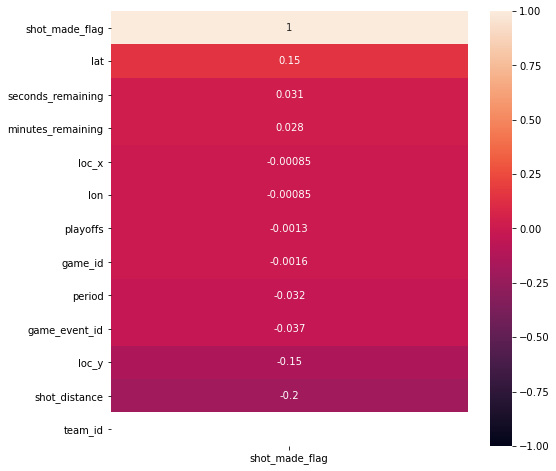

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df_raw.corr()[['shot_made_flag']].sort_values(by='shot_made_flag', ascending=False), annot=True, vmin=-1, vmax=1);

---

# 2. Data Cleaning and Feature Engineering

**Importing of the data looks good. Let's check out our columns.**

> Many of our numerical columns are very close to 0 correlation with shot_made_flag, our target, with a few exceptions.

- Shot distance, unsurprisingly, has one of the highest correlations with our target. Considering the farther one is from the basket (typically) increases the difficulty of the shot, this makes sense.
- lat and loc_y have high correlations, this makes sense when incorporating what we know about the first heatmap and these location variables correlating with each other, and shot distance. Shot distance would likely be the best variable from the location variables..
- Minutes and seconds remaining have a high correlation as well.


## List of our initial columns to be analyzed.

In [9]:
i = 1
for columns in df_raw.columns:
    print(i, columns)
    i+=1

1 action_type
2 combined_shot_type
3 game_event_id
4 game_id
5 lat
6 loc_x
7 loc_y
8 lon
9 minutes_remaining
10 period
11 playoffs
12 season
13 seconds_remaining
14 shot_distance
15 shot_made_flag
16 shot_type
17 shot_zone_area
18 shot_zone_basic
19 shot_zone_range
20 team_id
21 team_name
22 game_date
23 matchup
24 opponent


> **I will be going through these variables in what I believe to be their order of importance in predicting a made or missed shot, following the identification and initial analysis of our target variable.**

## Target Variable: ```shot_made_flag``` 

**Overall, how accurate was Kobe of a shooter?**

In [10]:
df_raw['shot_made_flag'].value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

**0 represents a miss and 1 represents a make, so on average Kobe Bryant made 44.6% of his shots.**

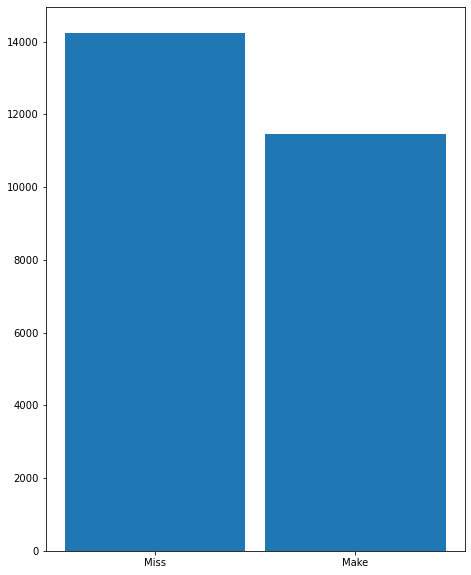

In [11]:
plt.figure(figsize=(7.5,10))
plt.bar(['Miss','Make'], 
        df_raw['shot_made_flag'].value_counts().values,
        width = 0.9);

**From reading the Kaggle description, they have removed 5000 values from our target column. Since we are not submitting this to Kaggle, we will drop these columns and use the rest for our Train/Test split and analysis.**

In [12]:
df_raw['shot_made_flag'].isnull().sum()

5000

In [13]:
df_raw.dropna(inplace=True)
df_raw.shape

(25697, 24)

### Keeping Track: Variables to check
1. ```action_type```
2. ```combined_shot_type```
3. ```game_event_id```
4. ```game_id```
5. ```lat```
6. ```loc_x```
7. ```loc_y```
8. ```lon```
9. ```minutes_remaining```
10. ```period```
11. ```playoffs```
12. ```season```
13. ```seconds_remaining```
14. ```shot_distance```
15. ~~```shot_made_flag```~~
16. ```shot_type```
17. ```shot_zone_area```
18. ```shot_zone_basic```
19. ```shot_zone_range```
20. ```team_id```
21. ```team_name```
22. ```game_date```
23. ```matchup```
24. ```opponent```

In [14]:
df_raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
6,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


## Shot Location: ```shot_zone_area, shot_zone_basic, shot_zone_range, shot_distance```

In [15]:
df_raw[['shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'shot_distance']].head()

,shot_zone_area,shot_zone_basic,shot_zone_range,shot_distance
shot_id,,,,
2,Left Side(L),Mid-Range,8-16 ft.,15
3,Left Side Center(LC),Mid-Range,16-24 ft.,16
4,Right Side Center(RC),Mid-Range,16-24 ft.,22
5,Center(C),Restricted Area,Less Than 8 ft.,0
6,Left Side(L),Mid-Range,8-16 ft.,14


> **These would appear to be the most important indicators for deciding whether a shot goes in or not on average due to their fundamental nature. As such, we will keep all of these columns for now and explore them further after looking over our other variables.**

> **Other variable that will remain or be engineered are there as secondary indicators to complement these variables, but our predictions will primarily be from these indicators.**

In [16]:
df_raw['shot_zone_area'].value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

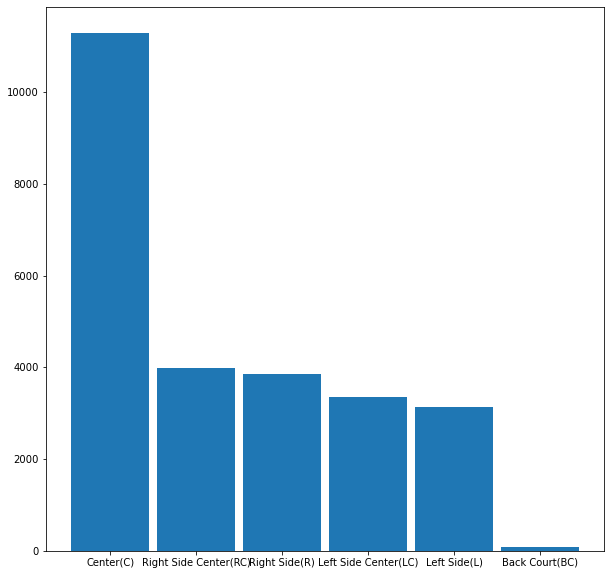

In [17]:
plt.figure(figsize=(10,10))
plt.bar(df_raw['shot_zone_area'].value_counts().index, 
        df_raw['shot_zone_area'].value_counts().values,
        width = 0.9);

In [18]:
i=0
for column in df_raw['shot_zone_area'].value_counts().index:
    print(column)
    print('Shots: ', df_raw[(df_raw['shot_zone_area'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['shot_zone_area'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['shot_zone_area'].value_counts()[i])*100,3))
    print()
    i+=1

Center(C)
Shots:  11289
Percent made:  52.556

Right Side Center(RC)
Shots:  3981
Percent made:  38.257

Right Side(R)
Shots:  3859
Percent made:  40.166

Left Side Center(LC)
Shots:  3364
Percent made:  36.118

Left Side(L)
Shots:  3132
Percent made:  39.687

Back Court(BC)
Shots:  72
Percent made:  1.389



In [19]:
df_raw['shot_zone_basic'].value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

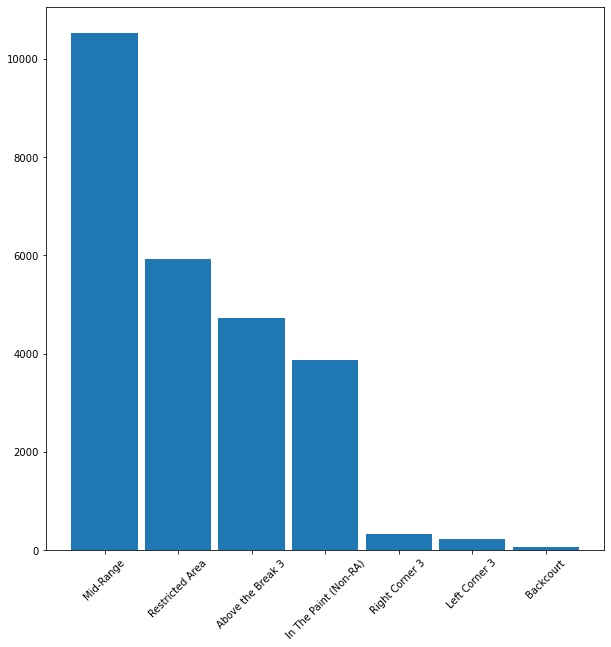

In [20]:
plt.figure(figsize=(10,10))
plt.bar(df_raw['shot_zone_basic'].value_counts().index, 
        df_raw['shot_zone_basic'].value_counts().values,
        width = 0.9)
plt.xticks(rotation=45);

In [21]:
i=0
for column in df_raw['shot_zone_basic'].value_counts().index:
    print(column)
    print('Shots: ', df_raw[(df_raw['shot_zone_basic'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['shot_zone_basic'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['shot_zone_basic'].value_counts()[i])*100,3))
    print()
    i+=1

Mid-Range
Shots:  10532
Percent made:  40.629

Restricted Area
Shots:  5932
Percent made:  61.8

Above the Break 3
Shots:  4720
Percent made:  32.924

In The Paint (Non-RA)
Shots:  3880
Percent made:  45.438

Right Corner 3
Shots:  333
Percent made:  33.934

Left Corner 3
Shots:  240
Percent made:  37.083

Backcourt
Shots:  60
Percent made:  1.667



In [22]:
df_raw['shot_zone_range'].value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

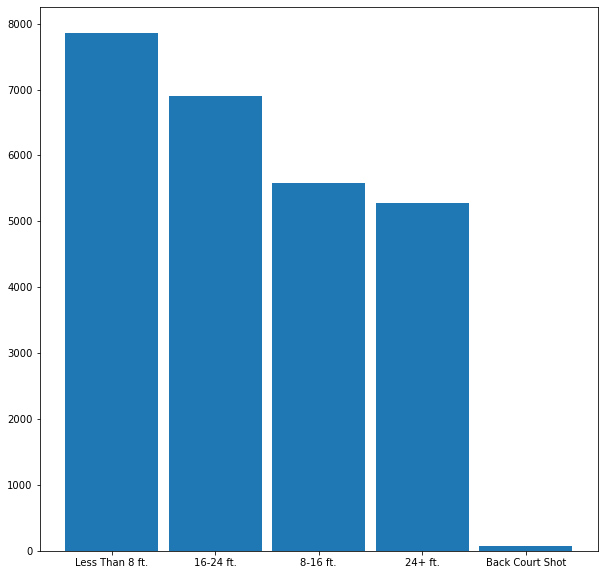

In [23]:
plt.figure(figsize=(10,10))
plt.bar(df_raw['shot_zone_range'].value_counts().index, 
        df_raw['shot_zone_range'].value_counts().values,
        width = 0.9);

In [24]:
i=0
for column in df_raw['shot_zone_range'].value_counts().index:
    print(column)
    print('Shots: ', df_raw[(df_raw['shot_zone_range'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['shot_zone_range'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['shot_zone_range'].value_counts()[i])*100,3))
    print()
    i+=1

Less Than 8 ft.
Shots:  7857
Percent made:  57.312

16-24 ft.
Shots:  6907
Percent made:  40.177

8-16 ft.
Shots:  5580
Percent made:  43.548

24+ ft.
Shots:  5281
Percent made:  33.251

Back Court Shot
Shots:  72
Percent made:  1.389



### Keeping Track: Variables to check
1. ```action_type```
2. ```combined_shot_type```
3. ```game_event_id```
4. ```game_id```
5. ```lat```
6. ```loc_x```
7. ```loc_y```
8. ```lon```
9. ```minutes_remaining```
10. ```period```
11. ```playoffs```
12. ```season```
13. ```seconds_remaining```
14. ~~```shot_distance```~~
15. ~~```shot_made_flag```~~
16. ```shot_type```
17. ~~```shot_zone_area```~~
18. ~~```shot_zone_basic```~~
19. ~~```shot_zone_range```~~
20. ```team_id```
21. ```team_name```
22. ```game_date```
23. ```matchup```
24. ```opponent```

In [25]:
df_raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
6,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


## In Game Move/Shot: ```combined_shot_type```, ```action_type```, and ```shot_type```

In [26]:
df_raw[['combined_shot_type', 'action_type', 'shot_type']].head()

,combined_shot_type,action_type,shot_type
shot_id,,,
2,Jump Shot,Jump Shot,2PT Field Goal
3,Jump Shot,Jump Shot,2PT Field Goal
4,Jump Shot,Jump Shot,2PT Field Goal
5,Dunk,Driving Dunk Shot,2PT Field Goal
6,Jump Shot,Jump Shot,2PT Field Goal


**The type of move and shot Kobe takes is also very important in determing the probability that he makes or misses his shot, although lesser so than the shot location variables.**

> ```combined_shot_type```, ```action_type```, and ```shot_type``` all look very closely related. Lets take a closer look.

In [27]:
df_raw['shot_type'].value_counts(normalize=True)

2PT Field Goal    0.789392
3PT Field Goal    0.210608
Name: shot_type, dtype: float64

- 78.9% of Kobe's shots were 2-point field goals
- 21.1% were 3-point field goals

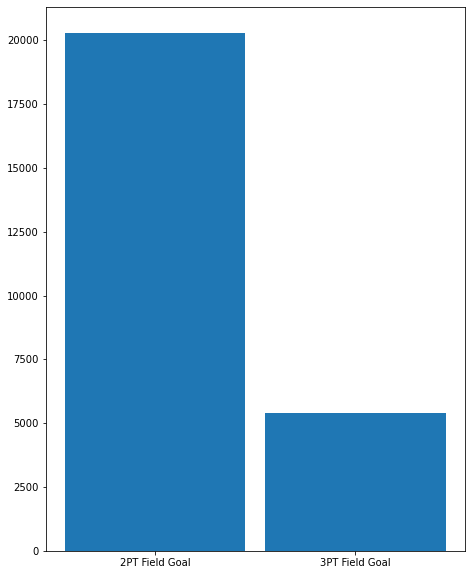

In [28]:
plt.figure(figsize=(7.5,10))
plt.bar(df_raw['shot_type'].value_counts().index, 
        df_raw['shot_type'].value_counts().values,
        width = 0.9);

**What is his 2-point shooting percentage?**

In [29]:
df_raw[(df_raw['shot_type'] == '2PT Field Goal') & (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['shot_type'].value_counts()[0]

0.4773477939364062

- 47.7%

**What is his 3-point shooting percentage?**

In [30]:
df_raw[(df_raw['shot_type'] == '3PT Field Goal') & (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['shot_type'].value_counts()[1]

0.32926829268292684

- 32.9%

> **Clearly he is much more likely to make a 2-point shot than a 3-point shot.**

In [31]:
df_raw['combined_shot_type'].value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

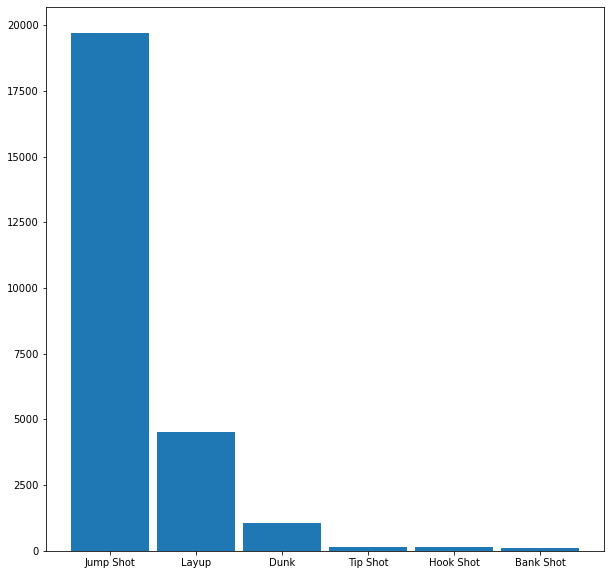

In [32]:
plt.figure(figsize=(10,10))
plt.bar(df_raw['combined_shot_type'].value_counts().index, 
        df_raw['combined_shot_type'].value_counts().values,
        width = 0.9);

**Jump Shot was clearly he most used type of shot. How accurate was Kobe for each type of shot?**

In [33]:
i=0
for column in df_raw['combined_shot_type'].value_counts().index:
    print(column)
    print('Shots: ', df_raw[(df_raw['combined_shot_type'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['combined_shot_type'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['combined_shot_type'].value_counts()[i])*100,3))
    print()
    i+=1

Jump Shot
Shots:  19710
Percent made:  39.107

Layup
Shots:  4532
Percent made:  56.509

Dunk
Shots:  1056
Percent made:  92.803

Tip Shot
Shots:  152
Percent made:  34.868

Hook Shot
Shots:  127
Percent made:  53.543

Bank Shot
Shots:  120
Percent made:  79.167



In [34]:
df_raw['action_type'].value_counts()

Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Running Layup Sh

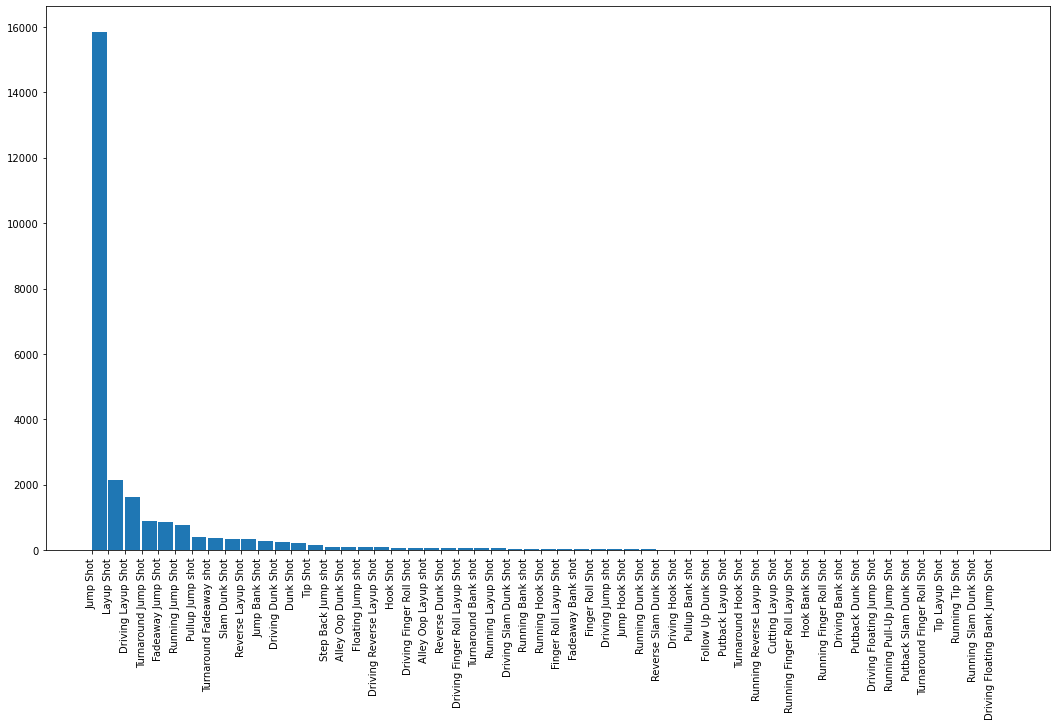

In [35]:
plt.figure(figsize=(18,10))
plt.bar(df_raw['action_type'].value_counts().index, 
        df_raw['action_type'].value_counts().values,
        align = 'edge',
        width = 0.9);
plt.xticks(rotation=90);

> **We see that jumpshot is overwhelmingly the most common shot. So much so that it is difficult to see the others.**

**Let's remove jumpshot and look again at the dropoff.**

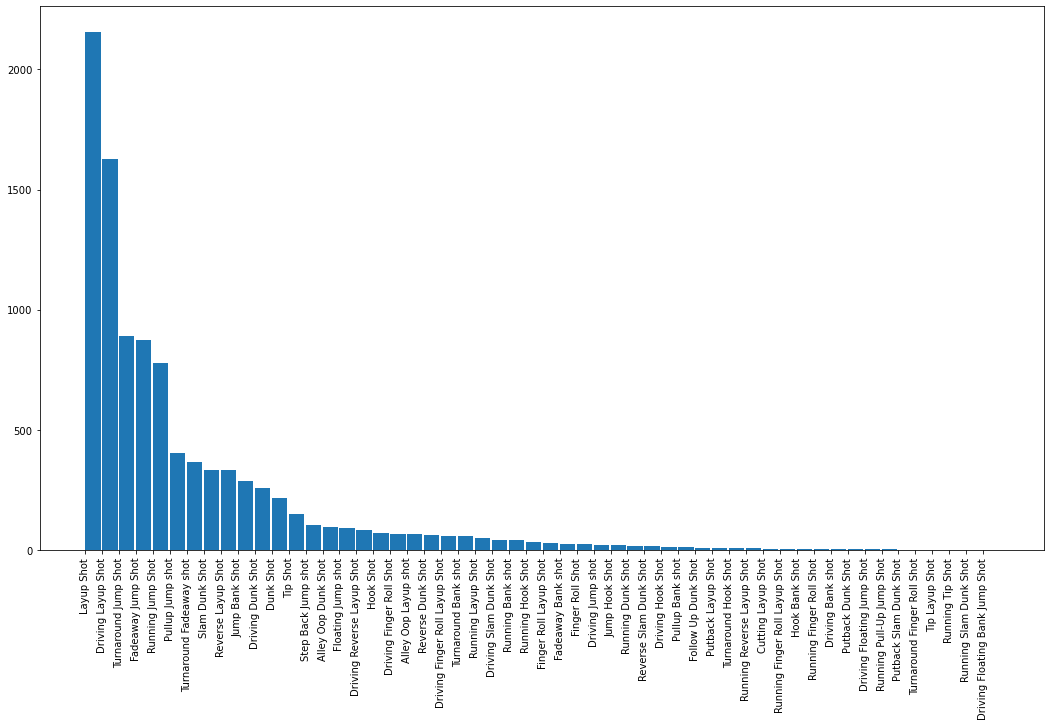

In [36]:
plt.figure(figsize=(18,10))
plt.bar(df_raw['action_type'].value_counts().index[1::], 
        df_raw['action_type'].value_counts().values[1::],
        align = 'edge',
        width = 0.9);
plt.xticks(rotation=90);

**```action_type``` is a little too messy of a column. It does provide some extra information about specifics of the ```combined_shot_type```, but given the other available variables and my time constraint I'm going to drop it.**

In [37]:
df_raw.drop(columns='action_type', inplace=True)

### Keeping Track: Variables to check
1. ~~```action_type```~~
2. ~~```combined_shot_type```~~
3. ```game_event_id```
4. ```game_id```
5. ```lat```
6. ```loc_x```
7. ```loc_y```
8. ```lon```
9. ```minutes_remaining```
10. ```period```
11. ```playoffs```
12. ```season```
13. ```seconds_remaining```
14. ~~```shot_distance```~~
15. ~~```shot_made_flag```~~
16. ~~```shot_type```~~
17. ~~```shot_zone_area```~~
18. ~~```shot_zone_basic```~~
19. ~~```shot_zone_range```~~
20. ```team_id```
21. ```team_name```
22. ```game_date```
23. ```matchup```
24. ```opponent```

In [38]:
df_raw.head()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
2,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
6,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


# Game Details: ```matchup```, ```opponent```, ```season```, ```playoffs```, and ```game_date```

**Now we want to consider the defense against Kobe's shots.**
- We will know what kind of defense he is facing through ```opponent``` and ```season```: Combined, these two would tell us who is on that team at that point in time and how that team faces against Kobe.
- ```matchup``` will tell us whether it is a home or away game.
- ```game_date``` does not appear to be useful when considering our goal is to predict whether he will make or miss a shot. ```game_date``` provides no predictive power not otherwise covered more efficiently in our other variables.
- ```game_id```, similarly to ```game_date```, provides no predictive power for the same reason. It is merely an identifier.

In [39]:
df_raw['season'].value_counts()

2005-06    1924
2002-03    1852
2008-09    1851
2007-08    1819
2009-10    1772
2001-02    1708
2006-07    1579
2000-01    1575
2010-11    1521
2011-12    1416
2003-04    1371
2012-13    1328
1999-00    1312
2004-05    1127
2015-16     932
1997-98     810
1998-99     765
2014-15     593
1996-97     383
2013-14      59
Name: season, dtype: int64

**What was Kobe's shooting percentage for each season?**

In [40]:
i=0
for column in df_raw['season'].value_counts().index:
    print(column)
    print('Shots: ', df_raw[(df_raw['season'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['season'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['season'].value_counts()[i])*100,3))
    print()
    i+=1

2005-06
Shots:  1924
Percent made:  45.374

2002-03
Shots:  1852
Percent made:  43.629

2008-09
Shots:  1851
Percent made:  46.786

2007-08
Shots:  1819
Percent made:  46.839

2009-10
Shots:  1772
Percent made:  45.372

2001-02
Shots:  1708
Percent made:  45.843

2006-07
Shots:  1579
Percent made:  45.788

2000-01
Shots:  1575
Percent made:  46.667

2010-11
Shots:  1521
Percent made:  44.642

2011-12
Shots:  1416
Percent made:  42.585

2003-04
Shots:  1371
Percent made:  43.326

2012-13
Shots:  1328
Percent made:  45.783

1999-00
Shots:  1312
Percent made:  46.037

2004-05
Shots:  1127
Percent made:  43.656

2015-16
Shots:  932
Percent made:  35.622

1997-98
Shots:  810
Percent made:  43.086

1998-99
Shots:  765
Percent made:  45.882

2014-15
Shots:  593
Percent made:  37.605

1996-97
Shots:  383
Percent made:  42.298

2013-14
Shots:  59
Percent made:  40.678



In [41]:
df_raw['playoffs'].value_counts()

0    21939
1     3758
Name: playoffs, dtype: int64

In [42]:
i=0
for column in df_raw['playoffs'].value_counts().index:
    print(column)
    print('Shots: ', df_raw[(df_raw['playoffs'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['playoffs'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['playoffs'].value_counts()[i])*100,3))
    print()
    i+=1

0
Shots:  21939
Percent made:  44.642

1
Shots:  3758
Percent made:  44.465



**There does not seem to be a significant difference in shooting percentage for playoff versus regular season games. For this reasons we will drop this column.**

**Matchup is in the form "LAL @ OPP" or "LAL vs. OPP" to denote home and away games.**

In [43]:
# Creating a new column that has a 1 if it is a home game and a 0 if it is away.
new_col = []
for stuff in df_raw['matchup']:
    if "@" in stuff:
        new_col.append(0) #Away game
    elif "vs." in stuff:
        new_col.append(1) #Home game
        
df_raw['home_away'] = new_col


df_raw['home_away'].value_counts()

0    13212
1    12485
Name: home_away, dtype: int64

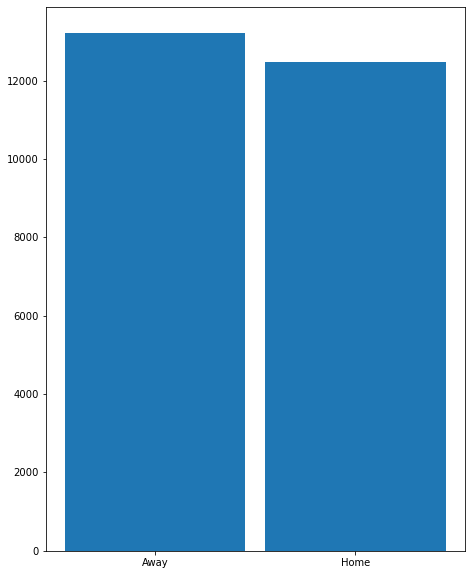

In [44]:
plt.figure(figsize=(7.5,10))
plt.bar(['Away','Home'], 
        df_raw['home_away'].value_counts().values,
        width = 0.9);

In [45]:
i=0
for column in df_raw['home_away'].value_counts().index:
    print(column)
    print('Shots: ', df_raw[(df_raw['home_away'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['home_away'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['home_away'].value_counts()[i])*100,3))
    print()
    i+=1

0
Shots:  13212
Percent made:  43.642

1
Shots:  12485
Percent made:  45.647



0 represents away and 1 represents home. We do see a 2% difference in made shot % so we will keep this feature.

**We want specific opponents as teams change year over year. So we want to combine ```season``` and ```opponent```**

In [46]:
# Creating a new column that combines season and opponent.
df_raw['opponent'] = df_raw['season'] + ' ' + df_raw['opponent']
df_raw[['opponent']].head()

,opponent
shot_id,
2,2000-01 POR
3,2000-01 POR
4,2000-01 POR
5,2000-01 POR
6,2000-01 POR


**Now we can drop ```matchup```, since its information is contained in ```home_away``` and ```opponent```**

In [47]:
df_raw.drop(columns=['matchup', 'game_date', 'game_id', 'playoffs', 'season'],inplace=True)

### Keeping Track: Variables to check
1. ~~```action_type```~~
2. ~~```combined_shot_type```~~
3. ```game_event_id```
4. ~~```game_id```~~
5. ```lat```
6. ```loc_x```
7. ```loc_y```
8. ```lon```
9. ```minutes_remaining```
10. ```period```
11. ~~```playoffs```~~
12. ~~```season```~~
13. ```seconds_remaining```
14. ~~```shot_distance```~~
15. ~~```shot_made_flag```~~
16. ~~```shot_type```~~
17. ~~```shot_zone_area```~~
18. ~~```shot_zone_basic```~~
19. ~~```shot_zone_range```~~
20. ```team_id```
21. ```team_name```
22. ~~```game_date```~~
23. ~~```matchup```~~
24. ~~```opponent```~~

In [48]:
df_raw.head()

,combined_shot_type,game_event_id,lat,loc_x,loc_y,lon,minutes_remaining,period,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,opponent,home_away
shot_id,,,,,,,,,,,,,,,,,,,
2,Jump Shot,12,34.0443,-157,0,-118.4268,10,1,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0
3,Jump Shot,35,33.9093,-101,135,-118.3708,7,1,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0
4,Jump Shot,43,33.8693,138,175,-118.1318,6,1,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0
5,Dunk,155,34.0443,0,0,-118.2698,6,2,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0
6,Jump Shot,244,34.0553,-145,-11,-118.4148,9,3,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0


## Game Timeline: ```minutes_remaining```,  ```seconds_remaining```, ```period```, and ```game_event_id```

---

**Does ```minutes_remaining``` mean for the entire game, or for that quarter (period)? What about ```seconds_remaining```?**
> *Also, where the hell is shot clock?*

In [49]:
df_raw[['minutes_remaining', 'seconds_remaining', 'period', 'game_event_id']].describe()

,minutes_remaining,seconds_remaining,period,game_event_id
count,25697.000000,25697.000000,25697.000000,25697.000000
mean,4.886796,28.311554,2.520800,249.348679
std,3.452475,17.523392,1.151626,149.778520
min,0.000000,0.000000,1.000000,2.000000
25%,2.000000,13.000000,1.000000,111.000000
50%,5.000000,28.000000,3.000000,253.000000
75%,8.000000,43.000000,3.000000,367.000000
max,11.000000,59.000000,7.000000,653.000000


- ```seconds_remaining``` ranges from 0 to 59.
- ```minutes_remaining``` ranges from 0 to 11.

Given what we know about basketball periods being 12 minutes long and there being 60 seconds in 1 minute, we realize these columns work in tandem to represent time left in the quarter (period).
> Let's combine these into a single column for ```time```.

In [50]:
df_raw[['minutes_remaining', 'seconds_remaining', 'period']].head()

,minutes_remaining,seconds_remaining,period
shot_id,,,
2,10,22,1
3,7,45,1
4,6,52,1
5,6,19,2
6,9,32,3


In [51]:
time_sec_remaining = []
for row in df_raw[['minutes_remaining', 'seconds_remaining']].iterrows():
    time_sec_remaining.append(row[1][0]*60 + row[1][1])

df_raw['time_sec_remaining'] = time_sec_remaining

In [52]:
df_raw[['minutes_remaining', 'seconds_remaining', 'time_sec_remaining', 'period']].head()

,minutes_remaining,seconds_remaining,time_sec_remaining,period
shot_id,,,,
2,10,22,622,1
3,7,45,465,1
4,6,52,412,1
5,6,19,379,2
6,9,32,572,3


In [53]:
df_raw[['time_sec_remaining']].describe()

,time_sec_remaining
count,25697.000000
mean,321.519321
std,208.311076
min,0.000000
25%,141.000000
50%,304.000000
75%,499.000000
max,714.000000


In [54]:
df_raw[['time_sec_remaining']].value_counts()

time_sec_remaining
0                     438
1                     178
2                     108
3                      81
37                     78
                     ... 
691                    11
711                     4
712                     3
714                     3
713                     2
Length: 715, dtype: int64

**Looks good. We don't need ```minutes_remaining``` or ```seconds_remaining``` anymore.**

In [55]:
df_raw['period'].value_counts()

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

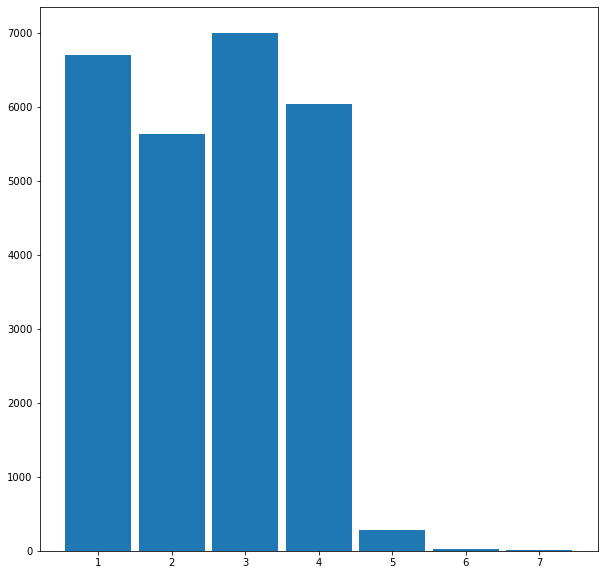

In [56]:
plt.figure(figsize=(10,10))
plt.bar(df_raw['period'].value_counts().index, 
        df_raw['period'].value_counts().values,
        width = 0.9);

In [57]:
for column in df_raw['period'].value_counts().index:
    print('Period: ', column)
    print('Shots: ', df_raw[(df_raw['period'] == column)].shape[0])
    print('Percent made: ', round((df_raw[(df_raw['period'] == column) & 
                                          (df_raw['shot_made_flag'] == 1)].shape[0] / df_raw['period'].value_counts()[column])*100,3))
    print()

Period:  3
Shots:  7002
Percent made:  45.344

Period:  1
Shots:  6700
Percent made:  46.567

Period:  4
Shots:  6043
Percent made:  41.37

Period:  2
Shots:  5635
Percent made:  44.88

Period:  5
Shots:  280
Percent made:  44.286

Period:  6
Shots:  30
Percent made:  46.667

Period:  7
Shots:  7
Percent made:  42.857



- First thing to note, periods 5,6, and 7 represent overtime.
- Contrary to what I would have believed, Kobe is actually least accurate in the 4th period. 

**Period does seem to provide predictive power and will remain.**

In [58]:
df_raw[['game_event_id']].describe()

,game_event_id
count,25697.000000
mean,249.348679
std,149.778520
min,2.000000
25%,111.000000
50%,253.000000
75%,367.000000
max,653.000000


In [59]:
df_raw[['game_event_id', 'shot_made_flag']].head()

,game_event_id,shot_made_flag
shot_id,,
2,12,0.0
3,35,1.0
4,43,0.0
5,155,1.0
6,244,0.0


In [60]:
len(df_raw['game_event_id'].unique())

618

This would be a difficult categorical to incorporate and its value is likely captures from our ```time_sec_remaining``` variable. Given the time constraint, I am going to drop ```game_event_id```. 

In [61]:
df_raw.drop(columns=['seconds_remaining', 'minutes_remaining', 'game_event_id'], inplace=True)

### Keeping Track: Variables to check
1. ~~```action_type```~~
2. ~~```combined_shot_type```~~
3. ~~```game_event_id```~~
4. ~~```game_id```~~
5. ```lat```
6. ```loc_x```
7. ```loc_y```
8. ```lon```
9. ~~```minutes_remaining```~~
10. ~~```period```~~
11. ~~```playoffs```~~
12. ~~```season```~~
13. ~~```seconds_remaining```~~
14. ~~```shot_distance```~~
15. ~~```shot_made_flag```~~
16. ~~```shot_type```~~
17. ~~```shot_zone_area```~~
18. ~~```shot_zone_basic```~~
19. ~~```shot_zone_range```~~
20. ```team_id```
21. ```team_name```
22. ~~```game_date```~~
23. ~~```matchup```~~
24. ~~```opponent```~~

In [62]:
df_raw.head()

,combined_shot_type,lat,loc_x,loc_y,lon,period,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,opponent,home_away,time_sec_remaining
shot_id,,,,,,,,,,,,,,,,,
2,Jump Shot,34.0443,-157,0,-118.4268,1,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,622
3,Jump Shot,33.9093,-101,135,-118.3708,1,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,465
4,Jump Shot,33.8693,138,175,-118.1318,1,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,412
5,Dunk,34.0443,0,0,-118.2698,2,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,379
6,Jump Shot,34.0553,-145,-11,-118.4148,3,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,572


## Location(?): ```lat, loc_x, loc_y, lon```

**These location variables look like theyre going to overlap one another**

In [63]:
df_raw[['lat', 'loc_x', 'loc_y', 'lon']].describe()

,lat,loc_x,loc_y,lon
count,25697.000000,25697.000000,25697.000000,25697.000000
mean,33.953043,7.148422,91.257345,-118.262652
std,0.088152,110.073147,88.152106,0.110073
min,33.253300,-250.000000,-44.000000,-118.519800
25%,33.884300,-67.000000,4.000000,-118.336800
50%,33.970300,0.000000,74.000000,-118.269800
75%,34.040300,94.000000,160.000000,-118.175800
max,34.088300,248.000000,791.000000,-118.021800


We saw before that these location variables are highly correlated with each other. The ones with large correlations with our target variable are better represented by ```shot_distance```. Therefore we can remove all of these varaibles to clean up our dataset.

In [64]:
df_raw.drop(columns=['loc_x', 'loc_y', 'lon', 'lat'], inplace=True)

### Keeping Track: Variables to check
1. ~~```action_type```~~
2. ~~```combined_shot_type```~~
3. ~~```game_event_id```~~
4. ~~```game_id```~~
5. ~~```lat```~~
6. ~~```loc_x```~~
7. ~~```loc_y```~~
8. ~~```lon```~~
9. ~~```minutes_remaining```~~
10. ~~```period```~~
11. ~~```playoffs```~~
12. ~~```season```~~
13. ~~```seconds_remaining```~~
14. ~~```shot_distance```~~
15. ~~```shot_made_flag```~~
16. ~~```shot_type```~~
17. ~~```shot_zone_area```~~
18. ~~```shot_zone_basic```~~
19. ~~```shot_zone_range```~~
20. ```team_id```
21. ```team_name```
22. ~~```game_date```~~
23. ~~```matchup```~~
24. ~~```opponent```~~

In [65]:
df_raw.head()

,combined_shot_type,period,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,opponent,home_away,time_sec_remaining
shot_id,,,,,,,,,,,,,
2,Jump Shot,1,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,622
3,Jump Shot,1,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,465
4,Jump Shot,1,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,412
5,Dunk,2,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,379
6,Jump Shot,3,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-01 POR,0,572


## Team Identifiers: ```team_name``` and ```team_id```

**I have some domain knowledge here being a NBA, Lakers, and Kobe fan that I can apply in removing columns.**
- He has only ever played for the Lakers, so ```team_name``` and ```team_id``` can be dropped.

Upon inspection, we will see these columns only have a single value:

In [66]:
df_raw['team_name'].unique()

array(['Los Angeles Lakers'], dtype=object)

In [67]:
df_raw['team_id'].unique()

array([1610612747], dtype=int64)

In [68]:
df_raw = df_raw.drop(columns=['team_id', 'team_name'])

### Keeping Track: Variables to check
1. ~~```action_type```~~
2. ~~```combined_shot_type```~~
3. ~~```game_event_id```~~
4. ~~```game_id```~~
5. ~~```lat```~~
6. ~~```loc_x```~~
7. ~~```loc_y```~~
8. ~~```lon```~~
9. ~~```minutes_remaining```~~
10. ~~```period```~~
11. ~~```playoffs```~~
12. ~~```season```~~
13. ~~```seconds_remaining```~~
14. ~~```shot_distance```~~
15. ~~```shot_made_flag```~~
16. ~~```shot_type```~~
17. ~~```shot_zone_area```~~
18. ~~```shot_zone_basic```~~
19. ~~```shot_zone_range```~~
20. ~~```team_id```~~
21. ~~```team_name```~~
22. ~~```game_date```~~
23. ~~```matchup```~~
24. ~~```opponent```~~

In [69]:
df_raw.head()

,combined_shot_type,period,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,home_away,time_sec_remaining
shot_id,,,,,,,,,,,
2,Jump Shot,1,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-01 POR,0,622
3,Jump Shot,1,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-01 POR,0,465
4,Jump Shot,1,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-01 POR,0,412
5,Dunk,2,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-01 POR,0,379
6,Jump Shot,3,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-01 POR,0,572


# 3. Pre-Modeling Exploratory Analysis

**Quick reminder of what columns we have after cleaning and feature engineering.**

In [71]:
i = 1
for columns in df_raw.columns:
    print(i, columns)
    i+=1

1 combined_shot_type
2 period
3 shot_distance
4 shot_made_flag
5 shot_type
6 shot_zone_area
7 shot_zone_basic
8 shot_zone_range
9 opponent
10 home_away
11 time_sec_remaining


## We're going to run basically what we did initially to explore our dataset after reading it in.

In [73]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 2 to 30697
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combined_shot_type  25697 non-null  object 
 1   period              25697 non-null  int64  
 2   shot_distance       25697 non-null  int64  
 3   shot_made_flag      25697 non-null  float64
 4   shot_type           25697 non-null  object 
 5   shot_zone_area      25697 non-null  object 
 6   shot_zone_basic     25697 non-null  object 
 7   shot_zone_range     25697 non-null  object 
 8   opponent            25697 non-null  object 
 9   home_away           25697 non-null  int64  
 10  time_sec_remaining  25697 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.4+ MB


In [74]:
df_raw.describe()

,period,shot_distance,shot_made_flag,home_away,time_sec_remaining
count,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,2.520800,13.457096,0.446161,0.485854,321.519321
std,1.151626,9.388725,0.497103,0.499810,208.311076
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,0.000000,0.000000,141.000000
50%,3.000000,15.000000,0.000000,0.000000,304.000000
75%,3.000000,21.000000,1.000000,1.000000,499.000000
max,7.000000,79.000000,1.000000,1.000000,714.000000


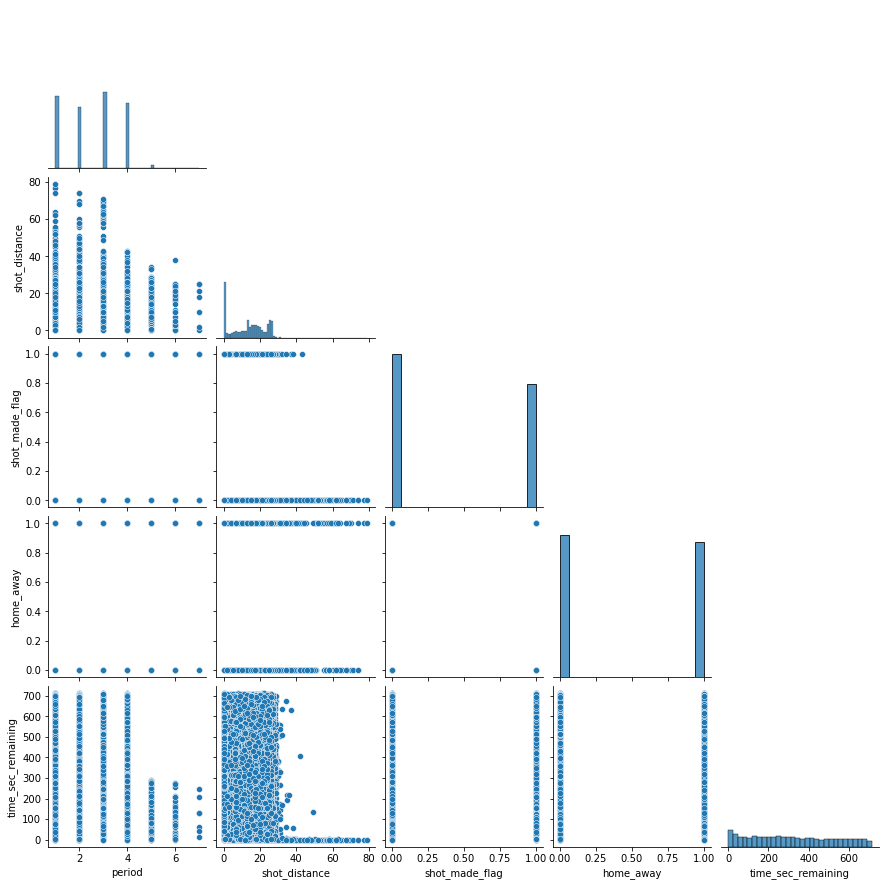

In [75]:
sns.pairplot(df_raw, corner=True);

> **Nothing looks too unusual on a very brief, inspection.**

### How do our numerical columns correlate with each other?

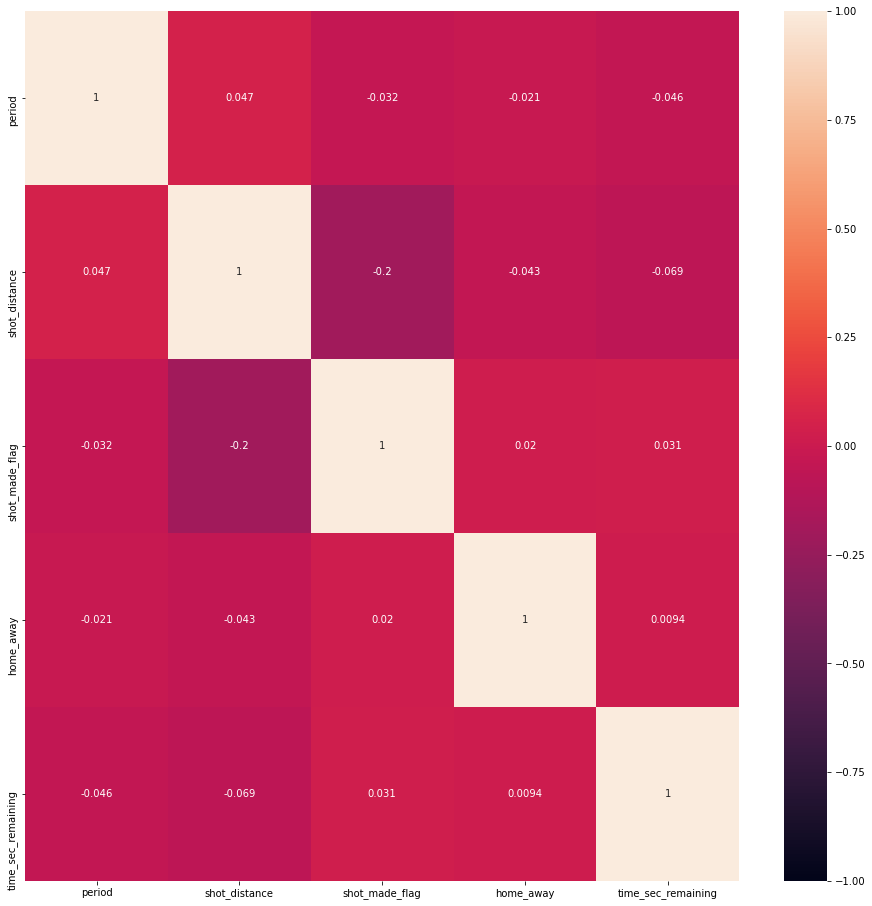

In [76]:
plt.figure(figsize=(16,16))
sns.heatmap(df_raw.corr(), annot=True, vmin=-1, vmax=1);

**No unreasonably high correlation between feature columns. We seem to have done a good job in eliminating the columns that were intercorrelated.**

*Note:* It is possible that we removed too much. This visualization and analysis would not account for things that we already removed.

### How do our numerical columns correlate with our Target column?

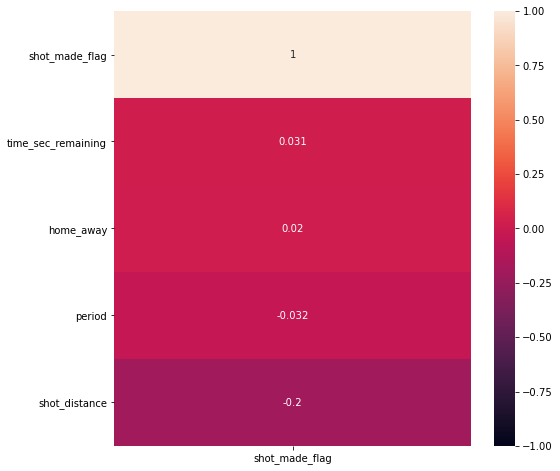

In [77]:
plt.figure(figsize=(8,8))
sns.heatmap(df_raw.corr()[['shot_made_flag']].sort_values(by='shot_made_flag', ascending=False), annot=True, vmin=-1, vmax=1);

**We have some small correlations with our target columns, but nothing *too* close to 0.**

### Reminder: These visualizations only show us our numerical columns. 

### However, considering the process and grouping we performed when selecting our columns, we can tentatively assume that these specific correlations are representative of their corresponding groups.

 # Save to CSV 

In [78]:
df_raw.to_csv('../data/kobe_data_cleaned.csv')